# Agent-Based Modelling

### _Shreya Raghavendra (13756877), Boyan Mihaylov (15067602), Eline van de Lagemaat (11892900), Sofia Tavitian (14824248), Chayenne Olumuyiwa (12055662)_

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import model as mdl
import agent as agt
import visualisation as vis

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
reload(mdl)
reload(agt)
reload(vis)

reload(mdl)
reload(agt)
reload(vis)

<module 'visualisation' from '/Users/chayenneolumuyiwa/Documents/Universiteit/Computational Science/jaar 1 /ABM/agent-based-modelling/Project/visualisation.py'>

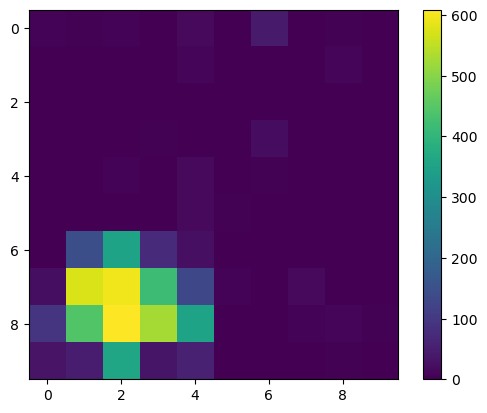

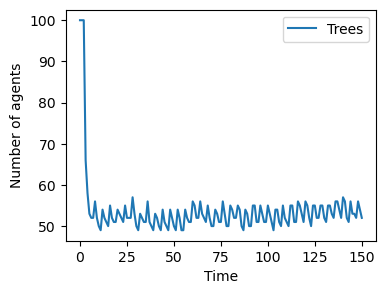

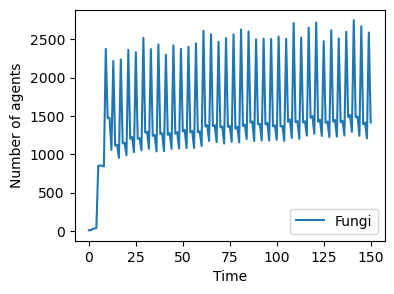

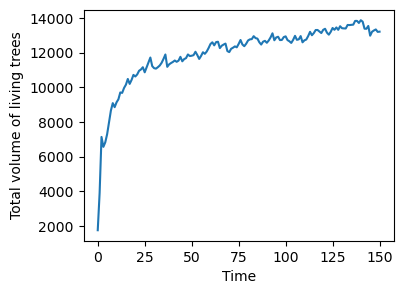

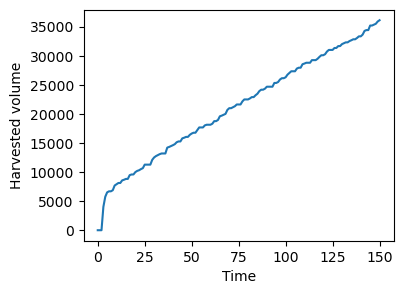

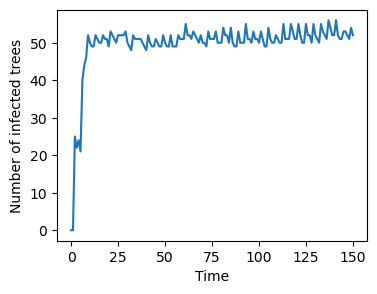

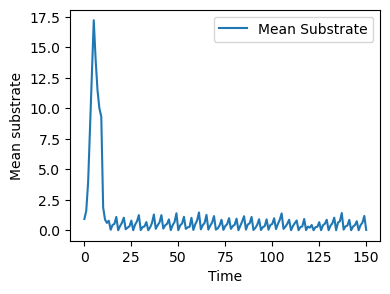

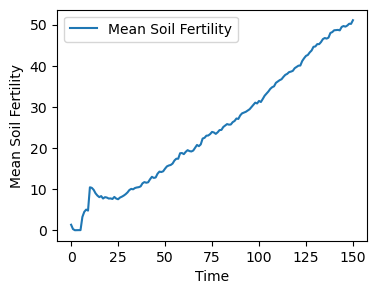

In [35]:
%matplotlib inline

width = 10
height = 10
n_init_trees = 100
n_init_fungi = 10
harvest_params = [100,0.5,0.5]
model = mdl.Forest(width, height, n_init_trees, n_init_fungi, harvest_params)
model.run_model(n_steps=150)

vis.plot_property_layer(model, "soil_fertility")

data = model.datacollector.get_model_vars_dataframe()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data[["Trees"]].plot(ax=ax)
ax.set(xlabel='Time', ylabel='Number of agents')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data[["Fungi"]].plot(ax=ax)
ax.set(xlabel='Time', ylabel='Number of agents')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data["Living Trees Total Volume"].plot(ax=ax)
ax.set(xlabel='Time', ylabel='Total volume of living trees')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data["Harvested volume"].plot(ax=ax)
ax.set(xlabel='Time', ylabel='Harvested volume')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data["Infected Trees"].plot(ax=ax)
ax.set(xlabel='Time', ylabel='Number of infected trees')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data[["Mean Substrate"]].plot(ax=ax)
ax.set(xlabel='Time', ylabel='Mean substrate')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data[["Mean Soil Fertility"]].plot(ax=ax)
ax.set(xlabel='Time', ylabel='Mean Soil Fertility')
plt.show()

In [36]:
reload(vis)
reload(agt)
reload(mdl)

reload(vis)
reload(agt)
reload(mdl)

<module 'model' from '/Users/chayenneolumuyiwa/Documents/Universiteit/Computational Science/jaar 1 /ABM/agent-based-modelling/Project/model.py'>

In [37]:
model_params = {
    "n_init_trees": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "n_init_fungi": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 50,
    "height": 50,
    "harvest_params": [10,0,1]
}

page = vis.create_jupyter_viz(mdl.Forest, model_params, measures=["Trees", "Fungi"])

page

Cannot show ipywidgets in text